In [1]:
#point to local path for lotus package directory
import sys
sys.path.append(r'C:\Users\Kingdel\Documents\GitHub')

from lotus import * #bulk import statement to import standard and custom libraries

Loading BokehJS ...

In [2]:
#dmm serial port setup
ser=serial.Serial('COM3',timeout=3.0)
ser.flushInput()

#experimentally determined gain factor
lpt_gain=0.000595 #inches per ohm

USB0::0x0957::0x0909::MY54204090::0::INSTR


,freq,Ls,Rs,timestamp
0,19.952623,3.259036,8.676615,1.053860
1,22.000079,0.489191,8.675864,2.042669
2,24.257637,2.469518,8.676837,2.986957
3,26.746855,5.156338,8.677176,3.958793
4,29.491507,6.241178,8.677800,4.858607


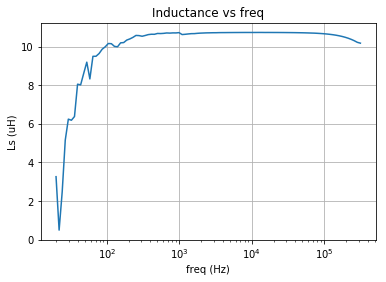

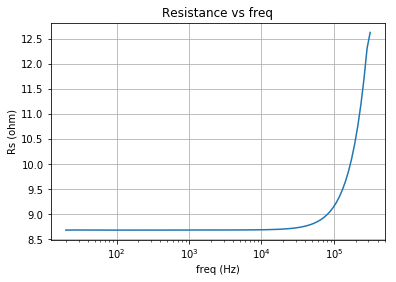

In [3]:
num_pts=100
lcr_df=lcr_sweep(num_pts)   

plot_sweep(lcr_df)
lcr_df.head(5)

In [4]:
rm,E4980AL=lcr_init()

freq=3000 #test frequency, in Hz

E4980AL.write(':FREQuency %f' % (freq))

USB0::0x0957::0x0909::MY54204090::0::INSTR


(24, <StatusCode.success: 0>)

In [5]:
interrupt=False #variable to control data loop
data=pd.DataFrame([],columns=['posn(in)','output(uH)','res(ohm)']) #blank dataframe to hold data

#setup plot
p1=figure(plot_width=650,plot_height=350)
t=show(p1,notebook_handle=True)

button=widgets.Button(description='start data logging')
display(button)

def when_clicked(b): #ugly hack to get real-time datalogging
    def get_data():
        global interrupt
        global data
        while not interrupt:     
                
                #potentiometer resistance
                cmd='READ?'
                res=dmm_cmd(cmd,ser,0.1)
                res=float(res.strip()) 
                x=res*lpt_gain
                
                # sensor voltage
                Ls,Rs=lcr_data(E4980AL)
                y = Ls*1e6
                              
                data.loc[len(data)]=[x,y,Rs]           
                r1=p1.circle(x,y,size=7)
                push_notebook(handle=t)

#                 time.sleep(0.5)
    thread = threading.Thread(target=get_data)
    thread.start()

button.on_click(when_clicked)


Button(description='start data logging', style=ButtonStyle())

In [6]:
output_dir=r'C:\Users\Kingdel\Desktop\data'
os.chdir(output_dir)

filename='run73.csv'

In [7]:
button2=widgets.Button(description='stop data logging')
display(button2)
def stop_thread(c):
    global interrupt
    interrupt=True
    
    data.to_csv(filename)
    lcr_df.to_csv('sweep_'+filename)
    
    
button2.on_click(stop_thread)

Button(description='stop data logging', style=ButtonStyle())

In [8]:
filename

'run73.csv'